In [1]:
from rich import print
import oab

2023-08-16 18:15:07.682854: I tensorflow/core/util/port.cc:110] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2023-08-16 18:15:07.720583: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-08-16 18:15:08.324125: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
2023-08-16 18:15:09.233151: I tensorflow/core/common_runtime/gpu/gpu_device.cc:2027] Ignoring visible gpu device (device: 1, name: NVIDIA GeForce GT 1030, pci bus id: 0000:65:00.0, compute capability: 6.1) with core count: 3. The minimum required cou

In [2]:
(X_train, Y_train), (X_test, Y_test), (X_tree, Y_tree) = oab.get_data()

Loading dataset

In [4]:
my_dom = oab.Domain("mnist")

In [7]:
test_point = oab.TestPoint(X_test[100], my_dom)

1/1 [==============================] - 0s 16ms/step


In [8]:
exp = oab.Explainer(test_point)

1/1 [==============================] - 0s 15ms/step


In [10]:
print(exp)

Explainer(
    testpoint=TestPoint(
        a=<class 'numpy.ndarray'>,
        domain=Domain(
            dataset='mnist',
            metadata={
                'ae_name': 'aae',
                'dataset': 'mnist',
                'path_aemodels': './data/aemodels/mnist/aae/',
                'shape': (28, 28, 3)
            },
            classes=['0', '1', '2', '3', '4', '5', '6', '7', '8', '9'],
            ae=AE(model=<class 'abele.adversarial.AdversarialAutoencoderMnist'>),
            blackbox=Blackbox(model=dict_keys(['predict', 'predict_proba']))
        ),
        blackboxpd=BlackboxPD(predicted_class='6'),
        latent=Latent(a=[ 1.3860296   0.8055085  -0.06739918  0.9765933 ], margins=None)
    ),
    howmany=3,
    save=False,
    target=TreePoint(
        id=3561,
        a=<class 'numpy.ndarray'>,
        domain=Domain(
            dataset='mnist',
            metadata={
                'ae_name': 'aae',
                'dataset': 'mnist',
                'path_aemodels': './data/aemodels/mnist/aae/',
                'shape': (28, 28, 3)
            },
            classes=['0', '1', '2', '3', '4', '5', '6', '7', '8', '9'],
            ae=AE(model=<class 'abele.adversarial.AdversarialAutoencoderMnist'>),
            blackbox=Blackbox(model=dict_keys(['predict', 'predict_proba']))
        ),
        latent=Latent(
            a=[ 1.689094    0.79567295 -0.24296227  1.123428  ],
            margins=array([[-2.95536147,  3.21534557],
       [-2.6318572 ,  2.45119308],
       [-2.38746824,  3.46247144],
       [-2.44599555,  2.69964624]])
        ),
        latentdt=LatentDT(
            predicted_class='6',
            model=DecisionTreeClassifier(max_depth=16, min_samples_leaf=0.001,
                       min_samples_split=0.002),
            fidelity=1.0,
            s_rules='{ 3 <= 1.20, 3 > 0.33, 2 <= 1.93, 2 > -0.31, 0 > 0.67, 1 > -0.45 } --> { class: 6 }',
            s_counterrules='{ { 3 <= -0.46 } --> { class: 0 }, { 3 <= -0.32 } --> { class: 0 }, { 1 <= -0.45 } --> 
{ class: 4 } }',
            rules=ComplexRule(
                rules={
                    3: [
                        Rule(feature=3, operator='<=', value=1.2, target_class='6'),
                        Rule(feature=3, operator='>', value=0.33, target_class='6')
                    ],
                    2: [
                        Rule(feature=2, operator='<=', value=1.93, target_class='6'),
                        Rule(feature=2, operator='>', value=-0.31, target_class='6')
                    ],
                    0: [Rule(feature=0, operator='>', value=0.67, target_class='6')],
                    1: [Rule(feature=1, operator='>', value=-0.45, target_class='6')]
                }
            ),
            counterrules=[
                Rule(feature=3, operator='<=', value=-0.46, target_class='0'),
                Rule(feature=3, operator='<=', value=-0.32, target_class='0'),
                Rule(feature=1, operator='<=', value=-0.45, target_class='4')
            ]
        ),
        blackboxpd=BlackboxPD(predicted_class='6')
    ),
    counterfactuals=[
        ImageExplanation(
            latent=Latent(a=[ 1.3860296   0.8055085  -0.06739918 -0.5       ], margins=None),
            a=<class 'numpy.ndarray'>,
            blackboxpd=BlackboxPD(predicted_class='6')
        ),
        ImageExplanation(
            latent=Latent(a=[ 1.3860296   0.8055085  -0.06739918 -0.36      ], margins=None),
            a=<class 'numpy.ndarray'>,
            blackboxpd=BlackboxPD(predicted_class='6')
        ),
        ImageExplanation(
            latent=Latent(a=[ 1.3860296  -0.49       -0.06739918  0.9765933 ], margins=None),
            a=<class 'numpy.ndarray'>,
            blackboxpd=BlackboxPD(predicted_class='6')
        )
    ],
    eps_factuals=[
        ImageExplanation(
            latent=Latent(a=[1.34093287 1.1133507  0.02470916 0.83735212], margins=None),
            a=<class 'numpy.ndarray'>,
            blackboxpd=BlackboxPD(predi

In [13]:
print(exp.factuals)

[
    ImageExplanation(
        latent=Latent(a=[1.03432935 0.34151894 1.2400971  0.45530073], margins=None),
        a=<class 'numpy.ndarray'>,
        blackboxpd=BlackboxPD(predicted_class='6')
    ),
    ImageExplanation(
        latent=Latent(a=[1.23224942 1.57103949 1.36931909 1.09288179], margins=None),
        a=<class 'numpy.ndarray'>,
        blackboxpd=BlackboxPD(predicted_class='2')
    ),
    ImageExplanation(
        latent=Latent(a=[0.81309044 0.48840993 1.41786832 0.84856913], margins=None),
        a=<class 'numpy.ndarray'>,
        blackboxpd=BlackboxPD(predicted_class='2')
    )
]

In [14]:
import matplotlib.pyplot as plt

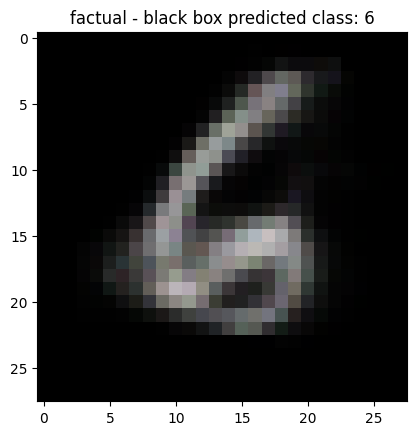

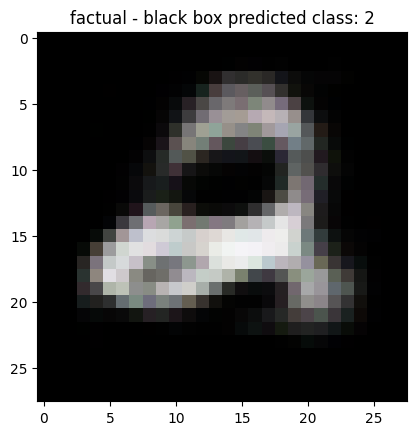

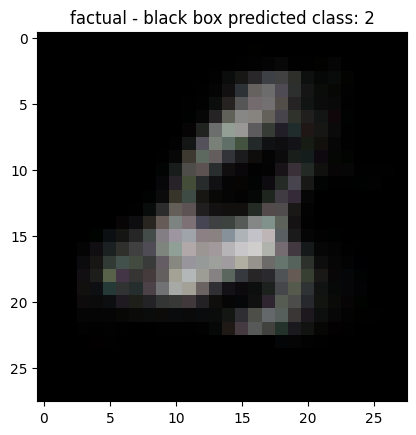

In [17]:
for point in exp.factuals:
    plt.imshow(point.a.astype("uint8"), cmap="gray")
    plt.title(f"factual - black box predicted class: {point.blackboxpd.predicted_class}")
    plt.show()

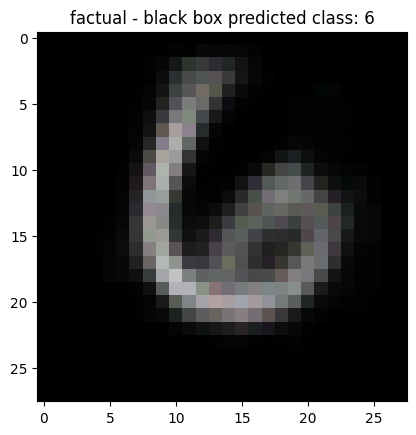

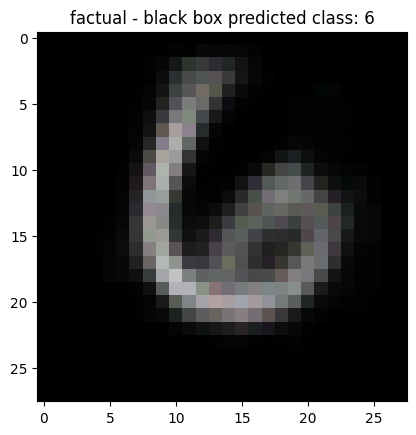

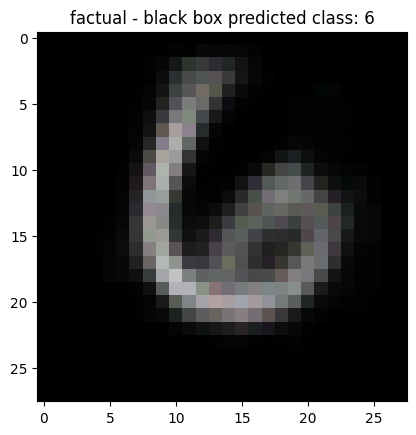

In [18]:
for point in exp.counterfactuals:
    plt.imshow(point.a.astype("uint8"), cmap="gray")
    plt.title(f"counterfactual - black box predicted class: {point.blackboxpd.predicted_class}")
    plt.show()